In [26]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_curve

In [3]:
df=pd.read_csv('gold fund.csv')
df.head()

,ID,Gender,AMB,AccountSince,RelationshipSize,AvgMonthlyTxn,DematAccounts,FD_Nos,MF_nos,Equity_mfs,Debt_mfs,Balanced_Funds,ELSS,PMS_accounts,Trading_Accounts,Speciality_funds,Gold_Fund
0,25,1,297.0,22,2,14,0,1,1,0,0,0,0,0,0,0,0
1,46,1,138.0,56,7,22,2,1,2,0,1,0,1,1,0,0,0
2,47,1,228.0,2,1,2,0,0,0,0,0,0,0,0,0,0,0
3,61,1,190.0,16,1,16,0,0,0,0,0,0,1,0,0,0,0
4,79,1,NaN,14,1,14,1,0,0,0,0,0,0,0,0,0,0


## Data Preprocessing

In [4]:
# Handle missing values
df.dropna(inplace=True)

## Exploratory Data Analysis (EDA)

In [5]:
print(df.describe())

                 ID      Gender         AMB  AccountSince  RelationshipSize  \
count    835.000000  835.000000  835.000000    835.000000        835.000000   
mean    6261.244311    0.731737  208.282635     26.316168          3.881437   
std     3613.162927    0.443321  101.633772     18.409821          3.466396   
min       25.000000    0.000000   17.000000      2.000000          1.000000   
25%     3145.500000    0.000000  130.500000     12.000000          1.000000   
50%     6304.000000    1.000000  207.000000     22.000000          2.000000   
75%     9375.000000    1.000000  282.000000     36.000000          6.000000   
max    12428.000000    1.000000  475.000000     94.000000         12.000000   

       AvgMonthlyTxn  DematAccounts      FD_Nos      MF_nos  Equity_mfs  \
count     835.000000     835.000000  835.000000  835.000000  835.000000   
mean       20.088623       0.626347    0.305389    0.754491    0.336527   
std       154.295263       0.977824    0.598886    1.088787    

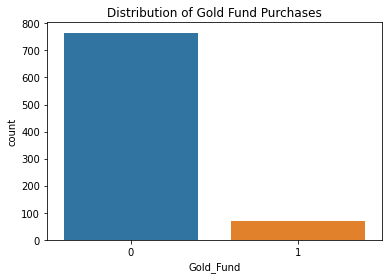

In [6]:
# Visualizing the distribution of the target variable
sns.countplot(x='Gold_Fund', data=df)
plt.title("Distribution of Gold Fund Purchases")
plt.show()

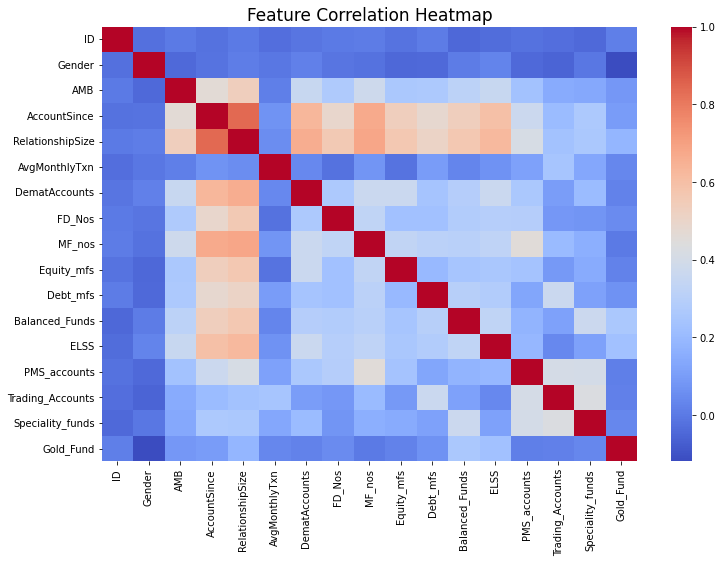

In [7]:
# Checking correlation between features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", fmt='.2f')
plt.title("Feature Correlation Heatmap",fontsize=17)
plt.show()

In [8]:
# Calculate Variance Inflation Factor (VIF)
X = df.drop(columns=['ID', 'Gold_Fund'])  # Removing non-relevant columns
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factor (VIF) values:")
print(vif_data)

Variance Inflation Factor (VIF) values:
             Feature        VIF
0             Gender   2.787871
1                AMB   5.375013
2       AccountSince  13.567307
3   RelationshipSize  25.596130
4      AvgMonthlyTxn   1.095692
5      DematAccounts   3.459285
6             FD_Nos   2.316120
7             MF_nos   4.286175
8         Equity_mfs   2.389251
9           Debt_mfs   2.175312
10    Balanced_Funds   2.477976
11              ELSS   2.609715
12      PMS_accounts   1.889171
13  Trading_Accounts   1.710825
14  Speciality_funds   1.635832


## Feature Engineering

In [9]:
# Drop features with VIF > 5
features_to_keep = vif_data[vif_data['VIF'] <= 5]['Feature'].tolist()
X = X[features_to_keep]

In [10]:
X.head(3)

,Gender,AvgMonthlyTxn,DematAccounts,FD_Nos,MF_nos,Equity_mfs,Debt_mfs,Balanced_Funds,ELSS,PMS_accounts,Trading_Accounts,Speciality_funds
0,1,14,0,1,1,0,0,0,0,0,0,0
1,1,22,2,1,2,0,1,0,1,1,0,0
2,1,2,0,0,0,0,0,0,0,0,0,0


## Model Training and Evaluation

In [13]:
# Feature-target split
y = df['Gold_Fund']

0      0
1      0
2      0
3      0
5      0
      ..
868    0
869    1
870    0
871    0
873    1
Name: Gold_Fund, Length: 835, dtype: int64

In [15]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
# Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [18]:
# Make predictions
y_pred = log_reg.predict(X_test)

In [23]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Model Accuracy: 0.89
Precision: 0.50
Recall: 0.11
F1-Score: 0.18


In [22]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       149
           1       0.50      0.11      0.18        18

    accuracy                           0.89       167
   macro avg       0.70      0.55      0.56       167
weighted avg       0.86      0.89      0.86       167

Confusion Matrix:
[[147   2]
 [ 16   2]]


## Fine tune model

In [ ]:
# False Negatives 16: Most concerning issue. Since most customers don’t buy the Gold Fund, the model learns to predict "No" most of the time.
# Need to fine tune the Threshold

In [51]:
# Get probability predictions
y_probs = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Tune the decision threshold
threshold = 0.3  # Adjust as needed
y_pred_adjusted = (y_probs > threshold).astype(int)

In [52]:
# Evaluate the model with the adjusted threshold
accuracy = accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)

print(f"Model Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Model Accuracy: 0.88
Precision: 0.42
Recall: 0.28
F1-Score: 0.33


In [53]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_adjusted))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adjusted))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       149
           1       0.42      0.28      0.33        18

    accuracy                           0.88       167
   macro avg       0.67      0.62      0.63       167
weighted avg       0.86      0.88      0.87       167

Confusion Matrix:
[[142   7]
 [ 13   5]]


## Adjust threshold and compare results

In [65]:
# Get probability predictions
y_probs_test = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for class 1 in test set
y_probs_train = log_reg.predict_proba(X_train)[:, 1]  # Probabilities for class 1 in train set

# Tune the decision threshold
threshold = 0.35

# Predictions for test set
y_pred_test_adjusted = (y_probs_test > threshold).astype(int)

# Predictions for train set
y_pred_train_adjusted = (y_probs_train > threshold).astype(int)

In [66]:
# Evaluate the model on the test set
print("Performance on Test Data:")
accuracy_test = accuracy_score(y_test, y_pred_test_adjusted)
precision_test = precision_score(y_test, y_pred_test_adjusted)
recall_test = recall_score(y_test, y_pred_test_adjusted)
f1_test = f1_score(y_test, y_pred_test_adjusted)
print(f"Test Accuracy: {accuracy_test:.2f}")
print(f"Test Precision: {precision_test:.2f}")
print(f"Test Recall: {recall_test:.2f}")
print(f"Test F1-Score: {f1_test:.2f}")
print("Classification Report (Test):")
print(classification_report(y_test, y_pred_test_adjusted))
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_test_adjusted))

# Evaluate the model on the train set
print("Performance on Train Data:")
accuracy_train = accuracy_score(y_train, y_pred_train_adjusted)
precision_train = precision_score(y_train, y_pred_train_adjusted)
recall_train = recall_score(y_train, y_pred_train_adjusted)
f1_train = f1_score(y_train, y_pred_train_adjusted)
print(f"Train Accuracy: {accuracy_train:.2f}")
print(f"Train Precision: {precision_train:.2f}")
print(f"Train Recall: {recall_train:.2f}")
print(f"Train F1-Score: {f1_train:.2f}")
print("Classification Report (Train):")
print(classification_report(y_train, y_pred_train_adjusted))
print("Confusion Matrix (Train):")
print(confusion_matrix(y_train, y_pred_train_adjusted))

Performance on Test Data:
Test Accuracy: 0.89
Test Precision: 0.44
Test Recall: 0.22
Test F1-Score: 0.30
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       149
           1       0.44      0.22      0.30        18

    accuracy                           0.89       167
   macro avg       0.68      0.59      0.62       167
weighted avg       0.86      0.89      0.87       167

Confusion Matrix (Test):
[[144   5]
 [ 14   4]]
Performance on Train Data:
Train Accuracy: 0.93
Train Precision: 0.64
Train Recall: 0.31
Train F1-Score: 0.42
Classification Report (Train):
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       616
           1       0.64      0.31      0.42        52

    accuracy                           0.93       668
   macro avg       0.79      0.65      0.69       668
weighted avg       0.92      0.93      0.92       668

Confusion Matrix (Trai

## Balance the dataset (SMOTE)

In [69]:
from imblearn.over_sampling import SMOTE

In [75]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_resampled, y_train_resampled)

# Get probability predictions
y_probs_test = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for class 1 in test set
y_probs_train = log_reg.predict_proba(X_train_resampled)[:, 1]  # Probabilities for class 1 in train set

# Tune the decision threshold
threshold = 0.4  # Adjust as needed

# Predictions for test set
y_pred_test_adjusted = (y_probs_test > threshold).astype(int)

# Predictions for train set
y_pred_train_adjusted = (y_probs_train > threshold).astype(int)

# Evaluate the model on the test set
print("Performance on Test Data:")
accuracy_test = accuracy_score(y_test, y_pred_test_adjusted)
precision_test = precision_score(y_test, y_pred_test_adjusted)
recall_test = recall_score(y_test, y_pred_test_adjusted)
f1_test = f1_score(y_test, y_pred_test_adjusted)
print(f"Test Accuracy: {accuracy_test:.2f}")
print(f"Test Precision: {precision_test:.2f}")
print(f"Test Recall: {recall_test:.2f}")
print(f"Test F1-Score: {f1_test:.2f}")
print("Classification Report (Test):")
print(classification_report(y_test, y_pred_test_adjusted))
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_test_adjusted))

# Evaluate the model on the train set
print("Performance on Train Data:")
accuracy_train = accuracy_score(y_train_resampled, y_pred_train_adjusted)
precision_train = precision_score(y_train_resampled, y_pred_train_adjusted)
recall_train = recall_score(y_train_resampled, y_pred_train_adjusted)
f1_train = f1_score(y_train_resampled, y_pred_train_adjusted)
print(f"Train Accuracy: {accuracy_train:.2f}")
print(f"Train Precision: {precision_train:.2f}")
print(f"Train Recall: {recall_train:.2f}")
print(f"Train F1-Score: {f1_train:.2f}")
print("Classification Report (Train):")
print(classification_report(y_train_resampled, y_pred_train_adjusted))
print("Confusion Matrix (Train):")
print(confusion_matrix(y_train_resampled, y_pred_train_adjusted))

Performance on Test Data:
Test Accuracy: 0.58
Test Precision: 0.17
Test Recall: 0.78
Test F1-Score: 0.29
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.95      0.56      0.70       149
           1       0.17      0.78      0.29        18

    accuracy                           0.58       167
   macro avg       0.56      0.67      0.49       167
weighted avg       0.87      0.58      0.66       167

Confusion Matrix (Test):
[[83 66]
 [ 4 14]]
Performance on Train Data:
Train Accuracy: 0.68
Train Precision: 0.67
Train Recall: 0.72
Train F1-Score: 0.70
Classification Report (Train):
              precision    recall  f1-score   support

           0       0.70      0.64      0.67       616
           1       0.67      0.72      0.70       616

    accuracy                           0.68      1232
   macro avg       0.69      0.68      0.68      1232
weighted avg       0.69      0.68      0.68      1232

Confusion Matrix (Train):


In [76]:
# Detect as many buyers as possible (high recall), so this model is okay